In [62]:
import simplejson as json, pandas as pd, numpy as np, pandasql
%matplotlib inline

In [4]:
frames=json.load(open('./frames.json'))

In [5]:
len(frames)

7110

In [19]:
frames[0]

{'mask': True,
 'opCode': 1,
 'text': '2probe',
 'time': 1512173858.178783,
 'type': 'send'}

In [20]:
df = pd.DataFrame.from_records(dict(len=len(f['text']), time=f['time']) for f in frames)

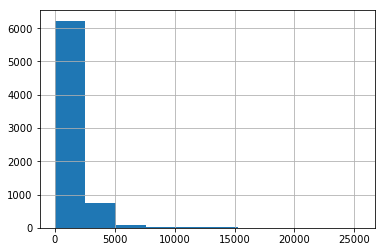

In [21]:
df['len'].hist()

In [24]:
df.head()

,len,time
0,6,1.512174e+09
1,6,1.512174e+09
2,1,1.512174e+09
3,195,1.512174e+09
4,1770,1.512174e+09


In [22]:
df.describe()

,len,time
count,7110.000000,7.110000e+03
mean,1444.372152,1.512174e+09
std,1429.492264,6.431757e+01
min,1.000000,1.512174e+09
25%,393.000000,1.512174e+09
50%,1343.500000,1.512174e+09
75%,1957.000000,1.512174e+09
max,25409.000000,1.512174e+09


In [63]:
grouped=(df.groupby(df['time'].astype(int)).agg({'len': 'sum'}))
grouped['time'] = grouped.index
grouped.reset_index(level=['time'], inplace=True)
grouped['len'].describe()

count      222.000000
mean     46258.945946
std      12979.141104
min      11626.000000
25%      37040.000000
50%      44740.500000
75%      52635.750000
max      96609.000000
Name: len, dtype: float64

We see ~46kB/s

In [64]:
frames[100]

{'mask': False,
 'opCode': 2,
 'text': u'\x04\n\x11\r\xaa[\xc2E\x15\x06\x88\xdfC0\xb4\xff\xb4\x07:\x00\n\x11\r,\x98\x00E\x15\xbb \x8bC0\xb6\xb5\xb5\x07:\x00\n\x11\r>\xb5CF\x15B\xe8\x94D0\xa6\xbb\xb5\x07:\x00\n\x11\r\xf1\xbf\xbdE\x15g\xba\xd1D0\xf4\xe3\xb5\x07:\x00\n\x11\r\xfa\x892F\x15\xde\xb2\xdfD0\x9b\xa0\xb6\x07:\x00\n\x13\r\xd6\xce\xc4E\x15\xb3\x80qD0\xe6\xae\xb6\x07:\x02\x18\x00\n\x11\r\x06\xc7\x1dF\x15\xa4b\xb7D0\xc0\xc2\xb6\x07:\x00\n\x0c\x15\xb25\xdaD0\xd8\xc6\xb6\x07:\x00\n\x11\r=<\x06F\x15"\xb1\xc0D0\xb3\xc7\xb6\x07:\x00\n\x11\r\x1b\xb3\x93E\x15\xf4\xdc\xe6D0\xc3\xc7\xb6\x07:\x00\n\x11\rR8]F\x15\xe7.\x9eD0\xde\xca\xb6\x07:\x00\n\x11\r\xce\x8aHF\x15NR\xcdD0\xdb\xd4\xb6\x07:\x00\n\x11\r\xd7\xf0JF\x15\x06\xc5\xd9D0\xa4\xe2\xb6\x07:\x00\n\x11\r\x86\xab F\x15\xd5{\xa9C0\x88\xe6\xb6\x07:\x00\n\x11\r}\x06\xc1E\x15\x08\x8b\x89D0\xeb\xe6\xb6\x07:\x00\n\x13\r\x98\x19cD\x15I\x1b\x04D0\xaa\xe9\xb6\x07:\x02\x18\x00\n\x11\r\x81\x96\x88D\x15\xf5\x1b\xb3D0\xc7\xea\xb6\x07:\x00\n\x11\rk\xef"F

In [65]:
frames[20]

{'mask': False,
 'opCode': 2,
 'text': u'\x04\n \r\x97\xfa\xc5E\x15\xa4\x81\xeaC\x1dJ}\x93B%\r\xa7\xc4B0\xb4\xff\xb4\x07:\x05\x15\xff\x15\xe8A\n\x11\r\xa8\x1a\xe2D\x15\xf6glC0\xb6\xb5\xb5\x07:\x00\n\x11\r\xfa\x08LF\x15\x80\xe1-D0\xa6\xbb\xb5\x07:\x00\n\x11\r%}\xc3E\x15\xcf\x96\xccD0\xf4\xe3\xb5\x07:\x00\n\x11\r37*F\x15\x06\x94\x91D0\x9b\xa0\xb6\x07:\x00\n\x11\r\x1f\x02\xbeE\x15\xd2O\x87D0\xe6\xae\xb6\x07:\x00\n\x0c\x15p\xeb\xccD0\xc0\xc2\xb6\x07:\x00\n\x11\r\xa9\xe0\xb8E\x15\x8c`\xa8D0\xd8\xc6\xb6\x07:\x00\n\x11\r"\x1e\nF\x15\x96\xc9\xcfD0\xb3\xc7\xb6\x07:\x00\n\x11\r5\r\x93E\x15\x9e\xfe\xcdD0\xc3\xc7\xb6\x07:\x00\n\x11\r\x0b[bF\x15\xe6o\xc2D0\xde\xca\xb6\x07:\x00\n\x11\r\xbaVIF\x15\xfa\x80\xe1D0\xdb\xd4\xb6\x07:\x00\n\x11\r\xb6tHF\x15\x90\xef\xddD0\xa4\xe2\xb6\x07:\x00\n\x11\r\xbe0\x1bF\x15\x95o\x1cD0\x88\xe6\xb6\x07:\x00\n\x0c\x15\xbc\xae"D0\x8f\xe6\xb6\x07:\x00\n\x11\r\xa4\xb8\x18F\x15\x1a\xff\xc2D0\xe7\xe6\xb6\x07:\x00\n\x11\r\x02Z\xc1E\x15p|\x9bD0\xeb\xe6\xb6\x07:\x00\n\x11\r\xdb\

In [66]:
frames[1000]

{'mask': False,
 'opCode': 2,
 'text': u'\x04\n\x0c\x15>D\xafC0\xb4\xff\xb4\x07:\x00\n\x0c\x15>\xd9\xe5C0\xb6\xb5\xb5\x07:\x00\n\x13\r\xab\xbd\x0bF\x15\xc0\x04HD0\xa6\xbb\xb5\x07:\x02\x18\x00\n\x11\rw(\xa9E\x15l\xad\x9aD0\xf4\xe3\xb5\x07:\x00\n\x13\rQ\xd2\x0cF\x15V\x86\xdeC0\x9b\xa0\xb6\x07:\x02\x18\x01\n\x11\r\\+\x13F\x15\x85\x9cTD0\xc0\xc2\xb6\x07:\x00\n\x13\rW\x97\xf2E\x15\x03\xde\xcbD0\xb3\xc7\xb6\x07:\x02\x18\x00\n\x11\r<\xf7\\E\x15\x9d\xa7\xa9D0\xc3\xc7\xb6\x07:\x00\n\x11\r\x13<_F\x15\x04\xd1\xddC0\xde\xca\xb6\x07:\x00\n\x11\r\x8b\xa1AF\x15M?\xc1D0\xdb\xd4\xb6\x07:\x00\n\x11\r\xf7<\tF\x15\x95\xb4\x97D0\x88\xe6\xb6\x07:\x00\n\x11\r\xa9\x8a\xc7E\x15\xef\xcc\xadD0\xeb\xe6\xb6\x07:\x00\n\x11\r\xffS\xb1D\x15\x81\xe4JD0\xaa\xe9\xb6\x07:\x00\n\x11\r\x19\x97@E\x15\xad\xf3\xcaD0\xb4\xf1\xb6\x07:\x00\n\x11\r1\xfb*F\x15k\xee\xabC0\x90\xf4\xb6\x07:\x00\n\x11\r\x9b\x1cVF\x15\xffi4D0\x9d\xfa\xb6\x07:\x00\n\x11\r\x99y\xd7D\x15\tP|D0\xc0\xfd\xb6\x07:\x00\n\x11\r\xe9\x7f\'F\x15\x82\x9e\xafD0\xe9\